## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'IDX Data Science Project Based Internship.ipynb',
 'loan_data_2007_2014.csv']

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')

In [4]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(466285, 75)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Target Variable

In [7]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [8]:
df['good_bad'] = np.where(df.loc[:, 'loan_status'].isin(['Fully Paid', 'Current', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']), 1, 0)

In [9]:
df.good_bad.value_counts()

1    414099
0     52186
Name: good_bad, dtype: int64

In [10]:
df[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


## Exploratory Data Analysis (EDA)

### Check Duplicates

In [11]:
df.duplicated().sum()

0

### Check Missing Values

In [12]:
miss_val = pd.DataFrame(df.isnull().sum()/df.shape[0])

In [13]:
# Check missing value above 50%
miss_val = miss_val[miss_val.iloc[:, 0] > 0.5]

In [14]:
miss_val.sort_values([0], ascending = False)

,0
open_il_24m,1.000000
mths_since_rcnt_il,1.000000
total_cu_tl,1.000000
inq_fi,1.000000
all_util,1.000000
max_bal_bc,1.000000
open_rv_24m,1.000000
open_rv_12m,1.000000
il_util,1.000000
total_bal_il,1.000000


### Handle Missing Values

In [15]:
# Removing Missing Values abouve 50%
df.dropna(thresh = df.shape[0] * 0.5, how = 'all', axis = 1, inplace = True)

In [16]:
miss_val = pd.DataFrame(df.isnull().sum()/df.shape[0])
miss_val = miss_val[miss_val.iloc[:, 0] > 0.5]
miss_val.sort_values([0], ascending = False)

,0


### Data Splitting

In [17]:
df.shape

(466285, 55)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('good_bad', axis = 1)
y = df['good_bad']

In [20]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_full_train, y_full_train, test_size = 0.25, random_state = 1)

In [22]:
X_train.shape, X_valid.shape, X_test.shape

((279771, 54), (93257, 54), (93257, 54))

In [23]:
279771/466285, 93257/466285, 93257/466285

(0.6, 0.2, 0.2)

In [24]:
y_train.value_counts(normalize = True)

1    0.888548
0    0.111452
Name: good_bad, dtype: float64

In [25]:
y_valid.value_counts(normalize = True)

1    0.887612
0    0.112388
Name: good_bad, dtype: float64

In [26]:
y_test.value_counts(normalize = True)

1    0.887151
0    0.112849
Name: good_bad, dtype: float64

### Data Cleaning

In [27]:
X_train.shape

(279771, 54)

In [28]:
X_train.select_dtypes(include = ['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
462513,60 months,D,D5,Sr. Engineering Manager,10+ years,RENT,Source Verified,Jan-14,Current,n,...,debt_consolidation,Credit Card Payoff,953xx,CA,May-89,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
245329,36 months,D,D3,Nursing Aide,2 years,RENT,Verified,Nov-14,Fully Paid,n,...,credit_card,Credit card refinancing,190xx,PA,May-05,w,Sep-15,NaN,Oct-15,INDIVIDUAL
48042,60 months,C,C2,Employee/Partner,10+ years,RENT,Source Verified,Dec-13,Current,n,...,credit_card,Credit card refinancing,751xx,TX,Jan-98,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL
73957,60 months,B,B3,Payroll manager,8 years,MORTGAGE,Verified,Oct-13,Current,n,...,debt_consolidation,credit consolidation,111xx,NY,Aug-94,f,Jan-16,Jan-16,Jan-16,INDIVIDUAL
111109,36 months,B,B3,emt,3 years,MORTGAGE,Verified,Aug-13,Fully Paid,n,...,home_improvement,kitchen upgrade,290xx,SC,Mar-85,f,May-15,NaN,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200590,36 months,A,A4,Madera Community Hospital,2 years,MORTGAGE,Not Verified,Sep-12,Fully Paid,n,...,credit_card,Family Debt Loan,936xx,CA,Jan-00,f,Aug-15,NaN,Jan-16,INDIVIDUAL
118399,36 months,B,B3,Bosworth Printing co.,9 years,RENT,Verified,Jul-13,Current,n,...,debt_consolidation,payoff,027xx,MA,Sep-04,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL
258570,36 months,D,D3,ASST. TO PERSONAL INJURY MGR.,6 years,RENT,Not Verified,Nov-14,Current,n,...,debt_consolidation,Debt consolidation,900xx,CA,Jul-87,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
402432,36 months,B,B5,lead technitian,7 years,OWN,Source Verified,Apr-14,Fully Paid,n,...,credit_card,Credit card refinancing,919xx,CA,Jan-06,w,Dec-15,NaN,Jan-16,INDIVIDUAL


In [29]:
for col in X_train.select_dtypes(include = ['object']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
[' 60 months' ' 36 months']

grade
['D' 'C' 'B' 'E' 'A' 'F' 'G']

sub_grade
['D5' 'D3' 'C2' 'B3' 'B2' 'D4' 'E1' 'B4' 'B1' 'C4' 'A2' 'C3' 'C1' 'A3'
 'E3' 'B5' 'A4' 'C5' 'A5' 'F4' 'D1' 'A1' 'E2' 'D2' 'E5' 'F5' 'E4' 'F2'
 'G1' 'F1' 'F3' 'G4' 'G2' 'G3' 'G5']

emp_title
['Sr. Engineering Manager' 'Nursing Aide' 'Employee/Partner' ...
 'ASST. TO PERSONAL INJURY MGR.' 'lead technitian' 'Fsr II']

emp_length
['10+ years' '2 years' '8 years' '3 years' '7 years' nan '6 years'
 '9 years' '4 years' '< 1 year' '5 years' '1 year']

home_ownership
['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE']

verification_status
['Source Verified' 'Verified' 'Not Verified']

issue_d
['Jan-14' 'Nov-14' 'Dec-13' 'Oct-13' 'Aug-13' 'Apr-13' 'Oct-14' 'Sep-13'
 'May-11' 'Jun-11' 'Apr-14' 'Jan-13' 'Nov-13' 'Jun-14' 'Mar-13' 'Jul-14'
 'Oct-12' 'Apr-08' 'Jul-10' 'Mar-14' 'Feb-13' 'Jun-13' 'Jul-11' 'Jun-12'
 'Sep-14' 'Aug-14' 'Dec-12' 'May-14' 'Sep-10' 'May-10' 'May-13' 'Jul-13'
 'Apr-10' 'Sep-12' 'Dec-14' 'Dec-11' 'Nov-09' '

In [30]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [31]:
X_train['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [32]:
X_train['term'] = X_train['term'].str.replace(' ', '')
X_train['term'] = X_train['term'].str.replace('months', '')

In [33]:
X_train['term'] = pd.to_numeric(X_train['term'])

In [34]:
X_train['term'].unique()

array([60, 36], dtype=int64)

In [35]:
X_train['emp_length'].unique()

array(['10+ years', '2 years', '8 years', '3 years', '7 years', nan,
       '6 years', '9 years', '4 years', '< 1 year', '5 years', '1 year'],
      dtype=object)

In [36]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' year', '')
X_train['emp_length'].fillna(value = 0, inplace = True)

In [37]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [38]:
X_train['emp_length'].unique()

array([10,  2,  8,  3,  7,  0,  6,  9,  4,  5,  1], dtype=int64)

In [39]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
462513,Jan-14,May-89,Jan-16,Feb-16,Jan-16
245329,Nov-14,May-05,Sep-15,NaN,Oct-15
48042,Dec-13,Jan-98,Jan-16,Feb-16,Jan-16
73957,Oct-13,Aug-94,Jan-16,Jan-16,Jan-16
111109,Aug-13,Mar-85,May-15,NaN,Jan-16
...,...,...,...,...,...
200590,Sep-12,Jan-00,Aug-15,NaN,Jan-16
118399,Jul-13,Sep-04,Jan-16,Feb-16,Jan-16
258570,Nov-14,Jul-87,Jan-16,Feb-16,Jan-16
402432,Apr-14,Jan-06,Dec-15,NaN,Jan-16


In [40]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%y')
    X_train[col] = X_train[col].apply(lambda x: x if x.year <= pd.Timestamp.now().year else x.replace(year=x.year-100))

In [41]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
462513,2014-01-01,1989-05-01,2016-01-01,2016-02-01,2016-01-01
245329,2014-11-01,2005-05-01,2015-09-01,NaT,2015-10-01
48042,2013-12-01,1998-01-01,2016-01-01,2016-02-01,2016-01-01
73957,2013-10-01,1994-08-01,2016-01-01,2016-01-01,2016-01-01
111109,2013-08-01,1985-03-01,2015-05-01,NaT,2016-01-01
...,...,...,...,...,...
200590,2012-09-01,2000-01-01,2015-08-01,NaT,2016-01-01
118399,2013-07-01,2004-09-01,2016-01-01,2016-02-01,2016-01-01
258570,2014-11-01,1987-07-01,2016-01-01,2016-02-01,2016-01-01
402432,2014-04-01,2006-01-01,2015-12-01,NaT,2016-01-01


In [42]:
# X_valid

# Term
X_valid['term'] = X_valid['term'].str.replace(' ', '')
X_valid['term'] = X_valid['term'].str.replace('months', '')
X_valid['term'] = pd.to_numeric(X_valid['term'])

# Emp_length
X_valid['emp_length'] = X_valid['emp_length'].str.replace('\+ years', '')
X_valid['emp_length'] = X_valid['emp_length'].str.replace(' years', '')
X_valid['emp_length'] = X_valid['emp_length'].str.replace('< 1 year', str(0))
X_valid['emp_length'] = X_valid['emp_length'].str.replace(' year', '')
X_valid['emp_length'].fillna(value = 0, inplace = True)
X_valid['emp_length'] = pd.to_numeric(X_valid['emp_length'])

# Date
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%y')
    X_train[col] = X_train[col].apply(lambda x: x if x.year <= pd.Timestamp.now().year else x.replace(year=x.year-100))

In [43]:
# X_test

# Term
X_test['term'] = X_test['term'].str.replace(' ', '')
X_test['term'] = X_test['term'].str.replace('months', '')
X_test['term'] = pd.to_numeric(X_test['term'])

# Emp_length
X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' year', '')
X_test['emp_length'].fillna(value = 0, inplace = True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])

# Date
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col], format='%b-%y')
    X_train[col] = X_train[col].apply(lambda x: x if x.year <= pd.Timestamp.now().year else x.replace(year=x.year-100))

In [44]:
X_valid[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93257 entries, 303027 to 379008
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   term                93257 non-null  int64 
 1   emp_length          93257 non-null  int64 
 2   issue_d             93257 non-null  object
 3   earliest_cr_line    93251 non-null  object
 4   last_pymnt_d        93189 non-null  object
 5   next_pymnt_d        47757 non-null  object
 6   last_credit_pull_d  93250 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.7+ MB


In [45]:
for col in X_train.select_dtypes(include = ['int', 'float']).columns:
    print(col)
    print(X_train[col].unique())
    print()

Unnamed: 0
[462513 245329  48042 ... 258570 402432 378004]

id
[10180525 35823248  9894727 ... 31347288 14728968 17583307]

member_id
[12032016 38518678 11746878 ... 33910525 16801414 19695835]

loan_amnt
[25000 10500 15000 ... 26175 29475 26525]

funded_amnt
[25000 10500 15000 ... 26175 29475 26525]

funded_amnt_inv
[25000.       10500.       15000.       ... 14592.92855   9482.741265
  5753.881294]

term
[60 36]

int_rate
[19.97 16.49 14.47 11.99 11.55 11.14 17.57 21.   12.35 17.49  9.99 19.99
 12.12  9.67 19.22 14.49 15.31 19.47 15.1   6.97 10.49 15.61 10.99 14.3
 20.31 13.55  7.14 21.18 15.8  12.49 13.35 19.05  5.99 10.74  7.9  17.1
 13.65  7.12  8.9  16.78 24.99 12.99 20.2   6.03 11.86 17.27 16.07 14.99
 20.49  7.69 14.33  8.39 13.05 16.2  15.22 17.77 21.7  14.27  9.17 17.14
 17.76 12.87 14.98 16.59 11.67 13.53 13.98 19.72 14.09 16.29 22.7   8.19
 13.8  16.99  6.49 13.11 14.64 25.57 21.49 15.88 24.89 23.1  19.52 18.75
 18.25  7.62 16.45 10.15 12.85 23.28  6.62  9.2  18.24 10.64 17

In [46]:
X_train.select_dtypes(include = ['int', 'float']).isnull().sum().sort_values(ascending = False)

total_rev_hi_lim              42072
tot_coll_amt                  42072
tot_cur_bal                   42072
revol_util                      209
collections_12_mths_ex_med       92
inq_last_6mths                   19
acc_now_delinq                   19
total_acc                        19
delinq_2yrs                      19
open_acc                         19
pub_rec                          19
annual_inc                        1
last_pymnt_amnt                   0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
funded_amnt                       0
total_rec_prncp                   0
policy_code                       0
loan_amnt                         0
member_id                         0
total_rec_int                     0
out_prncp                         0
total_pymnt_inv                   0
total_pymnt                       0
out_prncp_inv                     0
funded_amnt_inv                   0
id                          

<AxesSubplot:xlabel='total_rev_hi_lim'>

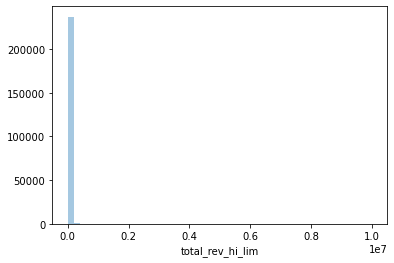

In [47]:
sns.distplot(X_train['total_rev_hi_lim'], kde = False, hist = True)

<AxesSubplot:>

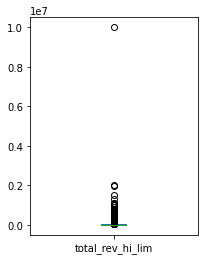

In [48]:
X_train['total_rev_hi_lim'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

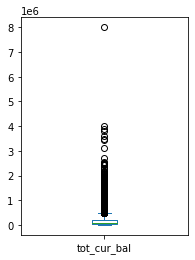

In [49]:
X_train['tot_cur_bal'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

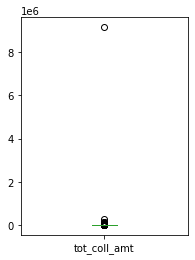

In [50]:
X_train['tot_coll_amt'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

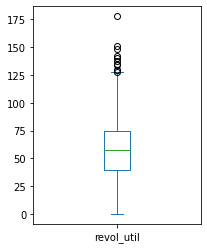

In [51]:
X_train['revol_util'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

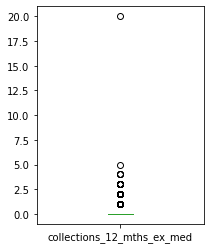

In [52]:
X_train['collections_12_mths_ex_med'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

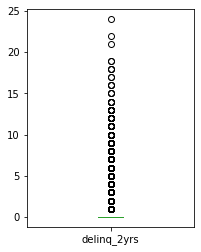

In [53]:
X_train['delinq_2yrs'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

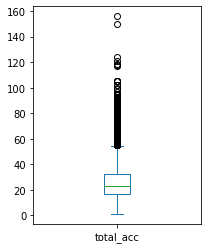

In [54]:
X_train['total_acc'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

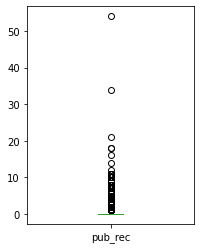

In [55]:
X_train['pub_rec'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

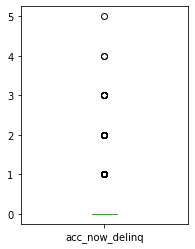

In [56]:
X_train['acc_now_delinq'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

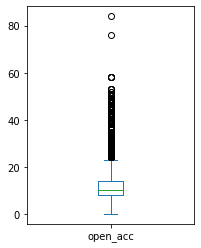

In [57]:
X_train['open_acc'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

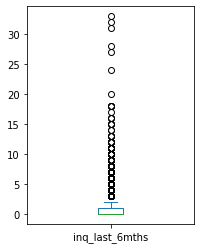

In [58]:
X_train['inq_last_6mths'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

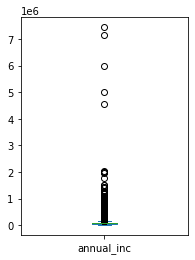

In [59]:
X_train['annual_inc'].plot(kind = 'box', figsize = (3, 4))

In [60]:
null_num_col = ['total_rev_hi_lim', 'tot_coll_amt', 'tot_cur_bal','revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs', 'total_acc', 'pub_rec', 'acc_now_delinq', 'open_acc', 'inq_last_6mths', 'annual_inc']

In [61]:
# Imputating Null data with Median
for col in null_num_col:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_valid[col] = X_valid[col].fillna(X_valid[col].median())
    X_test[col] = X_test[col].fillna(X_test[col].median())

In [62]:
X_train.select_dtypes(include = ['object']).isnull().sum().sort_values(ascending = False)

emp_title              16571
title                     14
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [63]:
for col in X_train.select_dtypes(include = ['int', 'float']).columns:
    print(col)
    print(X_train[col].unique())
    print()

Unnamed: 0
[462513 245329  48042 ... 258570 402432 378004]

id
[10180525 35823248  9894727 ... 31347288 14728968 17583307]

member_id
[12032016 38518678 11746878 ... 33910525 16801414 19695835]

loan_amnt
[25000 10500 15000 ... 26175 29475 26525]

funded_amnt
[25000 10500 15000 ... 26175 29475 26525]

funded_amnt_inv
[25000.       10500.       15000.       ... 14592.92855   9482.741265
  5753.881294]

term
[60 36]

int_rate
[19.97 16.49 14.47 11.99 11.55 11.14 17.57 21.   12.35 17.49  9.99 19.99
 12.12  9.67 19.22 14.49 15.31 19.47 15.1   6.97 10.49 15.61 10.99 14.3
 20.31 13.55  7.14 21.18 15.8  12.49 13.35 19.05  5.99 10.74  7.9  17.1
 13.65  7.12  8.9  16.78 24.99 12.99 20.2   6.03 11.86 17.27 16.07 14.99
 20.49  7.69 14.33  8.39 13.05 16.2  15.22 17.77 21.7  14.27  9.17 17.14
 17.76 12.87 14.98 16.59 11.67 13.53 13.98 19.72 14.09 16.29 22.7   8.19
 13.8  16.99  6.49 13.11 14.64 25.57 21.49 15.88 24.89 23.1  19.52 18.75
 18.25  7.62 16.45 10.15 12.85 23.28  6.62  9.2  18.24 10.64 17

### Feature Engineering

In [64]:
model_col = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'grade', 'home_ownership', 'term', 'emp_length', 'loan_amnt', 'int_rate', 'annual_inc']

In [65]:
X_train[model_col]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d,grade,home_ownership,term,emp_length,loan_amnt,int_rate,annual_inc
462513,2014-01-01,1989-05-01,2016-01-01,2016-01-01,D,RENT,60,10,25000,19.97,96000.0
245329,2014-11-01,2005-05-01,2015-09-01,2015-10-01,D,RENT,36,2,10500,16.49,24000.0
48042,2013-12-01,1998-01-01,2016-01-01,2016-01-01,C,RENT,60,10,15000,14.47,48000.0
73957,2013-10-01,1994-08-01,2016-01-01,2016-01-01,B,MORTGAGE,60,8,15000,11.99,95000.0
111109,2013-08-01,1985-03-01,2015-05-01,2016-01-01,B,MORTGAGE,36,3,6000,11.55,48000.0
...,...,...,...,...,...,...,...,...,...,...,...
200590,2012-09-01,2000-01-01,2015-08-01,2016-01-01,A,MORTGAGE,36,2,18000,7.90,100000.0
118399,2013-07-01,2004-09-01,2016-01-01,2016-01-01,B,RENT,36,9,9925,11.55,29000.0
258570,2014-11-01,1987-07-01,2016-01-01,2016-01-01,D,RENT,36,6,9100,16.49,38000.0
402432,2014-04-01,2006-01-01,2015-12-01,2016-01-01,B,OWN,36,7,13500,12.99,55000.0


In [66]:
X_train = X_train[model_col]
X_valid = X_valid[model_col]
X_test = X_valid[model_col]

In [67]:
X_train['earliest_cr_line'].sort_values(ascending = False)

236606   2011-11-01
242835   2011-10-01
241630   2011-10-01
245422   2011-10-01
258892   2011-10-01
            ...    
42517           NaT
42494           NaT
42533           NaT
42527           NaT
42516           NaT
Name: earliest_cr_line, Length: 279771, dtype: datetime64[ns]

In [68]:
from datetime import date

date.today().strftime('%Y-%m-%d')

'2024-05-31'

In [69]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = '%b-%y')
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace = True)
    
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [70]:
# apply to X_valid
date_columns(X_valid, 'earliest_cr_line')
date_columns(X_valid, 'issue_d')
date_columns(X_valid, 'last_pymnt_d')
date_columns(X_valid, 'last_credit_pull_d')

In [71]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [72]:
X_train.isnull().sum()

grade                              0
home_ownership                     0
term                               0
emp_length                         0
loan_amnt                          0
int_rate                           0
annual_inc                         0
mths_since_earliest_cr_line       19
mths_since_issue_d                 0
mths_since_last_pymnt_d          228
mths_since_last_credit_pull_d     28
dtype: int64

<AxesSubplot:>

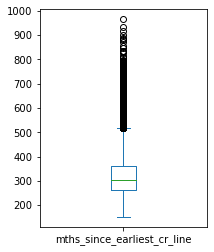

In [73]:
X_train['mths_since_earliest_cr_line'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

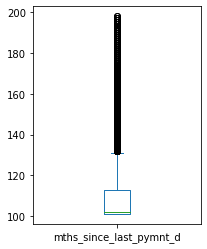

In [74]:
X_train['mths_since_last_pymnt_d'].plot(kind = 'box', figsize = (3, 4))

<AxesSubplot:>

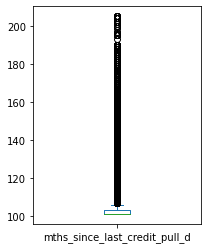

In [75]:
X_train['mths_since_last_credit_pull_d'].plot(kind = 'box', figsize = (3, 4))

In [76]:
# Fill missing value with median
X_train.fillna(X_train.median(), inplace = True)
X_valid.fillna(X_train.median(), inplace = True)
X_test.fillna(X_train.median(), inplace = True)

#### Ordinal Preprocessing

In [77]:
X_train['grade'].unique()

array(['D', 'C', 'B', 'E', 'A', 'F', 'G'], dtype=object)

In [78]:
# Checking if grade affecting loas_status

# Grouping grade & loan_status
grade_loan_status_count = df.groupby(['grade', 'loan_status']).size().unstack()

# Proportion of each grade of loan_status
grade_loan_status_prop = grade_loan_status_count.div(grade_loan_status_count.sum(axis=1), axis=0)

print("Grade proportion for each loan_status value:")
print(grade_loan_status_prop)

Grade proportion for each loan_status value:
loan_status  Charged Off   Current   Default  \
grade                                          
A               0.033753  0.470047  0.000401   
B               0.066874  0.467461  0.001088   
C               0.095145  0.505623  0.002059   
D               0.126782  0.487202  0.002757   
E               0.159689  0.481836  0.003636   
F               0.202963  0.430645  0.002797   
G               0.218844  0.388019  0.004816   

loan_status  Does not meet the credit policy. Status:Charged Off  \
grade                                                              
A                                                     0.000107     
B                                                     0.000621     
C                                                     0.001181     
D                                                     0.002562     
E                                                     0.004419     
F                                             

In [79]:
# Change grade data type from object to int

grade = {'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7}

In [80]:
# Mapping new grade to 'X_split'

X_train['grade'] = X_train['grade'].map(grade)
X_valid['grade'] = X_valid['grade'].map(grade)
X_test['grade'] = X_test['grade'].map(grade)

In [81]:
X_train

,grade,home_ownership,term,emp_length,loan_amnt,int_rate,annual_inc,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
462513,4,RENT,60,10,25000,19.97,96000.0,421.0,125.0,101.0,101.0
245329,4,RENT,36,2,10500,16.49,24000.0,229.0,115.0,105.0,104.0
48042,5,RENT,60,10,15000,14.47,48000.0,317.0,126.0,101.0,101.0
73957,6,MORTGAGE,60,8,15000,11.99,95000.0,358.0,128.0,101.0,101.0
111109,6,MORTGAGE,36,3,6000,11.55,48000.0,471.0,130.0,109.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...
200590,7,MORTGAGE,36,2,18000,7.90,100000.0,293.0,141.0,106.0,101.0
118399,6,RENT,36,9,9925,11.55,29000.0,237.0,131.0,101.0,101.0
258570,4,RENT,36,6,9100,16.49,38000.0,443.0,115.0,101.0,101.0
402432,6,OWN,36,7,13500,12.99,55000.0,221.0,122.0,102.0,101.0


#### Nominal Preprocessing

In [82]:
X_train['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [83]:
from sklearn.feature_extraction import DictVectorizer

In [84]:
dv = DictVectorizer(sparse = False)

In [85]:
# Changing dataframe to dictionary

X_train_dicts = X_train.to_dict(orient = 'records')
X_valid_dicts = X_valid.to_dict(orient = 'records')
X_test_dicts = X_test.to_dict(orient = 'records')

In [86]:
X_train_dicts = dv.fit_transform(X_train_dicts)

In [87]:
X_valid_dicts = dv.transform(X_valid_dicts)
X_test_dicts = dv.transform(X_test_dicts)

In [88]:
# Changing back data from dictionary to dataframe

X_train_final = pd.DataFrame(X_train_dicts, columns = dv.get_feature_names())
X_valid_final = pd.DataFrame(X_valid_dicts, columns = dv.get_feature_names())
X_test_final = pd.DataFrame(X_test_dicts, columns = dv.get_feature_names())

In [89]:
X_valid_final.head()

,annual_inc,emp_length,grade,home_ownership=MORTGAGE,home_ownership=NONE,home_ownership=OTHER,home_ownership=OWN,home_ownership=RENT,int_rate,loan_amnt,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_credit_pull_d,mths_since_last_pymnt_d,term
0,55400.0,10.0,6.0,0.0,0.0,0.0,1.0,0.0,9.17,12000.0,239.0,116.0,101.0,101.0,36.0
1,48000.0,2.0,7.0,0.0,0.0,0.0,0.0,1.0,6.62,7500.0,201.0,139.0,116.0,121.0,36.0
2,54000.0,8.0,6.0,1.0,0.0,0.0,0.0,0.0,9.17,6000.0,262.0,119.0,101.0,101.0,36.0
3,66000.0,10.0,7.0,1.0,0.0,0.0,0.0,0.0,6.62,24000.0,487.0,132.0,105.0,117.0,36.0
4,85000.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,6.03,4700.0,255.0,139.0,128.0,128.0,36.0


## Data Modelling

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(random_state = 42)

In [92]:
model.fit(X_train_final, y_train)
y_valid_pred = model.predict_proba(X_valid_final)[:, 1]

In [93]:
y_valid_pred

array([0.89283692, 0.90094207, 0.92583699, ..., 0.82075971, 0.91834514,
       0.91948996])

In [94]:
from sklearn.metrics import roc_auc_score

In [95]:
print('LogisticRegression ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

LogisticRegression ROC-AUC Result:  0.739


In [96]:
# Imbalance Class
y_train.value_counts(normalize = True)

1    0.888548
0    0.111452
Name: good_bad, dtype: float64

In [97]:
y_valid_pred = (y_valid_pred > 0.5).astype(int)

In [98]:
from sklearn.metrics import confusion_matrix

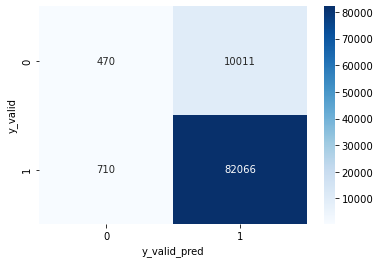

In [99]:
cm = confusion_matrix(y_valid, y_valid_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_valid_pred')
plt.ylabel('y_valid')

plt.show()

In [100]:
print('LogisticRegression ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

LogisticRegression ROC-AUC Result:  0.518


In [101]:
y_valid_pred = model.predict_proba(X_valid_final)[:, 1]

In [102]:
y_valid_pred

array([0.89283692, 0.90094207, 0.92583699, ..., 0.82075971, 0.91834514,
       0.91948996])

(array([4.5000e+01, 8.7000e+01, 1.6700e+02, 3.7700e+02, 7.1300e+02,
        1.5090e+03, 3.3020e+03, 7.6540e+03, 2.7219e+04, 5.2184e+04]),
 array([0.04300687, 0.13870619, 0.2344055 , 0.33010481, 0.42580412,
        0.52150344, 0.61720275, 0.71290206, 0.80860137, 0.90430069,
        1.        ]),
 <BarContainer object of 10 artists>)

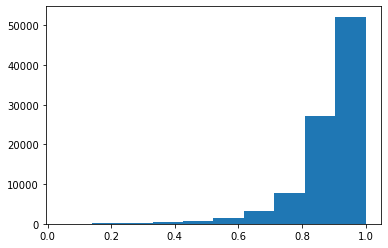

In [103]:
plt.hist(y_valid_pred)

In [104]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred)

In [105]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.8787226699218773

In [106]:
y_valid_pred = (y_valid_pred > 0.8787226699218773).astype(int)

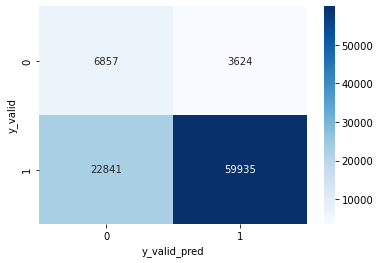

In [107]:
cm = confusion_matrix(y_valid, y_valid_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_valid_pred')
plt.ylabel('y_valid')

plt.show()

In [108]:
print('LogisticRegression ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

LogisticRegression ROC-AUC Result:  0.689


### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=42)

In [111]:
y_valid_pred = model.predict_proba(X_valid_final)[:, 1]
print('RandomForest ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

RandomForest ROC-AUC Result:  0.905


In [112]:
# Imbalance Class
y_train.value_counts(normalize = True)

1    0.888548
0    0.111452
Name: good_bad, dtype: float64

In [113]:
y_valid_pred = (y_valid_pred > 0.5).astype(int)

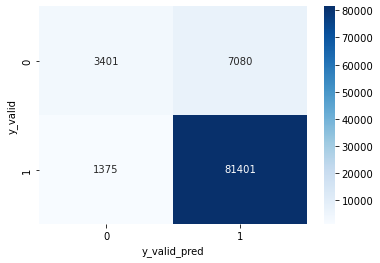

In [114]:
cm = confusion_matrix(y_valid, y_valid_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_valid_pred')
plt.ylabel('y_valid')

plt.show()

In [115]:
print('RandomForest ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

RandomForest ROC-AUC Result:  0.654


In [116]:
y_valid_pred = model.predict_proba(X_valid_final)[:, 1]

(array([5.5000e+01, 2.5800e+02, 8.4400e+02, 1.5940e+03, 2.5920e+03,
        3.8290e+03, 4.8680e+03, 6.5450e+03, 1.1376e+04, 6.1296e+04]),
 array([0.05 , 0.145, 0.24 , 0.335, 0.43 , 0.525, 0.62 , 0.715, 0.81 ,
        0.905, 1.   ]),
 <BarContainer object of 10 artists>)

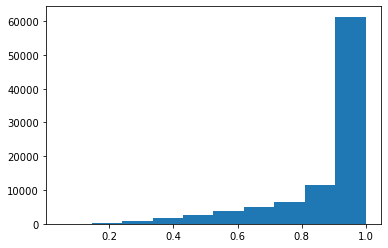

In [117]:
plt.hist(y_valid_pred)

In [118]:
fpr, tpr, thresholds = roc_curve(y_valid, y_valid_pred)

In [119]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.86

In [120]:
y_valid_pred = (y_valid_pred > 0.86).astype(int)

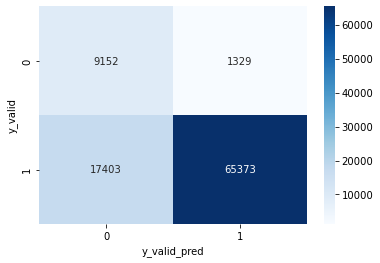

In [121]:
cm = confusion_matrix(y_valid, y_valid_pred)

sns.heatmap(cm, annot = True, fmt = '.0f', cmap = plt.cm.Blues)
plt.xlabel('y_valid_pred')
plt.ylabel('y_valid')

plt.show()

In [122]:
print('RandomForest ROC-AUC Result: ', roc_auc_score(y_valid, y_valid_pred).round(3))

RandomForest ROC-AUC Result:  0.831


In [123]:
from lime.lime_tabular import LimeTabularExplainer

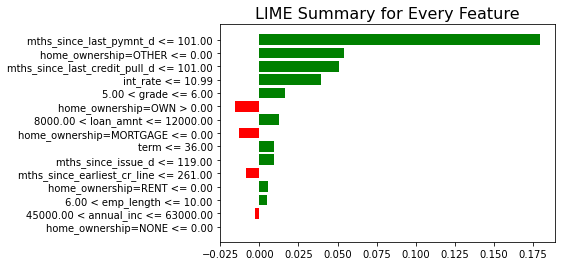

In [134]:
explainer = LimeTabularExplainer(
    training_data=X_train_final.values,
    feature_names=X_train_final.columns.tolist(), 
    class_names=['Rejected', 'Approved'], 
    mode='classification'
)

explanation = explainer.explain_instance(
    X_test_final.iloc[0], 
    model.predict_proba, 
    num_features=15
)

explanation.show_in_notebook()

explanation.as_pyplot_figure()
plt.title('LIME Summary for Every Feature', size=16)
plt.show()